In [1]:
#Importamos las bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leemos el archivo "Nogal.csv" con la siguiente función para empezar a trabajar.
df = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )
df.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Tipso de variables que tiene nuestro DataFrame
df.dtypes

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [4]:
#Eliminamos los datos que no nos brinden información
df.drop( df.columns[18:36], axis=1, inplace=True )
df.drop( df.columns[2:4], axis=1, inplace=True )
df.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [5]:
#Verificamos que se hayan eliminado la información inutil
df.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [6]:
#Combinamos las columnas de "DATA" y "TIME" en una sola llamada "FECHA"
#Quitamos las las columnas "DATA" y "TIME" de nuestro DataFrame
df['FECHA'] = df['DATE'] + ' ' + df['TIME']                                    
df=df.drop(['DATE'],1)
df=df.drop(['TIME'],1)

In [7]:
df.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3,NaN
1,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
2,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
3,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
4,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40


In [8]:
#Hacemos que el tipo de variable variable de las columna sea numerica en vez de tipo object
df[df.columns[0:14]] = df[df.columns[0:14]].apply(pd.to_numeric, errors='coerce')
df.dtypes

u_Avg          float64
v_Avg          float64
w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA           object
dtype: object

In [9]:
#Encontraremos la correlación que pudiera existir entre cada variable, para esto empleamos la función corr con el metodo pearson
df1 = df.corr(method='pearson', min_periods=1)
df1

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241773,0.028537,0.058863,-0.047981,-0.093187,0.089411,0.003093,-0.138616,-0.363807,0.326205,-0.372100,0.107109,0.173845
v_Avg,0.241773,1.000000,0.016387,0.019921,0.153061,-0.116671,0.029321,-0.053957,-0.075175,-0.341920,0.099303,-0.346782,-0.103330,-0.189840
w_Avg,0.028537,0.016387,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133
t_Avg,0.058863,0.019921,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896
kh20_Avg,-0.047981,0.153061,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760
net_rad_Avg,-0.093187,-0.116671,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003093,-0.053957,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206
vv_Avg,-0.138616,-0.075175,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064
airT_Avg,-0.363807,-0.341920,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621


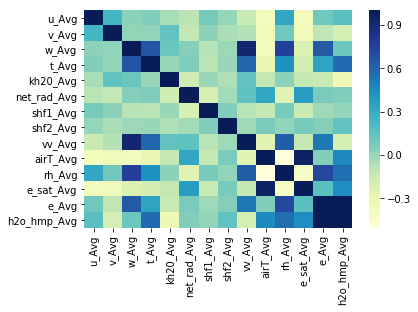

In [10]:
#HeatMap usando seaborn
sns.heatmap(df1, cmap="YlGnBu")
plt.savefig('Gráfica1_sns', plt = 20000)

plt.show()

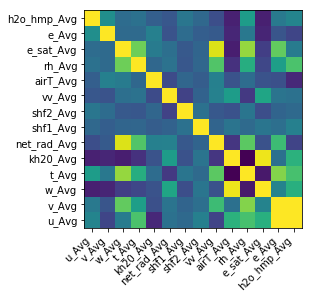

In [11]:
#HeatMap usando Matplotlib
#Cramos la gráfica
fig, df1_pl = plt.subplots()
#Tamaño de los ejers
df1_pl.set_xticks(np.arange(len(df1)))      
df1_pl.set_yticks(np.arange(len(df1)))
#Agregamos los nombres de cada variable en los ejes.
df1_pl.set_xticklabels(df1)                 
df1_pl.set_yticklabels(df1.columns[::-1])
#Ajuste en las caracteristicas de la gráfica
plt.setp(df1_pl.get_xticklabels(), ha="right",rotation=45)
#Mostramos la gráfica
plt.imshow(df1)
plt.savefig('Gráfica1_pl',plt=2000) 
plt.show()

In [12]:
#Ahora graficares las datos que tengan una correlación mayo a 6 (corr>0.6)

Text(0.5,1,'h2o_hmp_Avg vs w_Avg (corr=0.999154)')

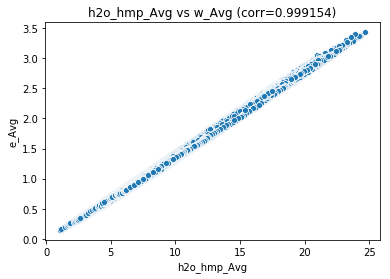

In [13]:
#(1)h2o_hmp_Avg VS e_Avg
sns.scatterplot(x=df["h2o_hmp_Avg"], y= df["e_Avg"])
plt.title("h2o_hmp_Avg vs w_Avg (corr=0.999154)")

Text(0.5,1,'vv_Avg vs rh_Avg (corr=0.624201)')

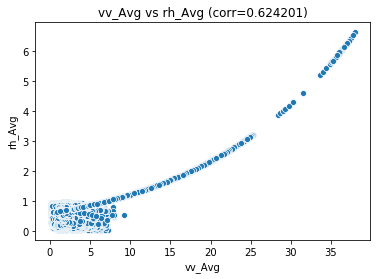

In [14]:
#(2)vv_Avg VS rh_Avg
sns.scatterplot(x=df["vv_Avg"], y= df["rh_Avg"])
plt.title("vv_Avg vs rh_Avg (corr=0.624201)")

Text(0.5,1,'w_Avg vs t_Avg (corr=0.667294)')

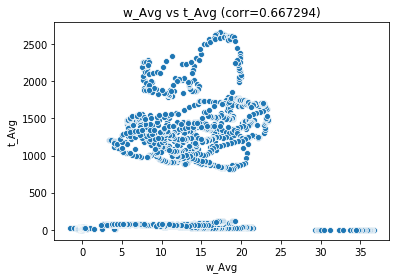

In [15]:
#(3)w_Avg vs t_Avg
sns.scatterplot(x=df["w_Avg"], y= df["t_Avg"])
plt.title("w_Avg vs t_Avg (corr=0.667294)")

Text(0.5,1,'airT_Avg vs e_sat_Avg (corr=0.641772)')

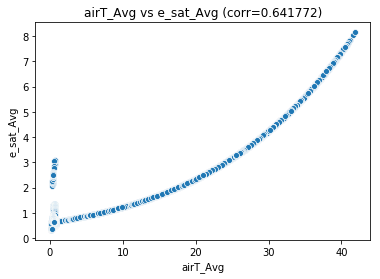

In [16]:
#(4)airT_Avg vs e_sat_Avg
sns.scatterplot(x=df["airT_Avg"], y= df["e_sat_Avg"])
plt.title("airT_Avg vs e_sat_Avg (corr=0.641772)")

Text(0.5,1,'e_Avg vs w_Avg (corr=0.641772)')

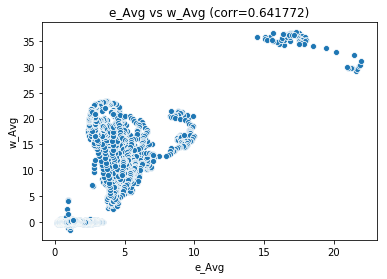

In [17]:
#(5)e_Avg vs w_Avg
sns.scatterplot(x=df["e_Avg"], y= df["w_Avg"])
plt.title("e_Avg vs w_Avg (corr=0.641772)")

Text(0.5,1,'h2o_hmp_Avg vs h2o_hmp_Avg (corr=1)')

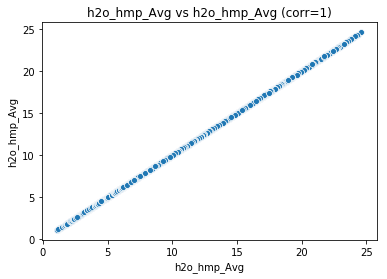

In [18]:
#(6)h2o_hmp_Avg VS h2o_hmp_Avg
sns.scatterplot(x=df["h2o_hmp_Avg"], y= df["h2o_hmp_Avg"])
plt.title("h2o_hmp_Avg vs h2o_hmp_Avg (corr=1)")